# Sheet 4 Exercise 1: Linear Dynamical System (Credits: 6)
Note: The notebook contains all problems parts of the first exercise. Please create the plots that are asked for in the notebook and type out the corresponding interpretations. All computations are supposed to be carried out by hand! You need to submit your computations to complete the exercise. You can either write your computations into the notebook using LaTeX syntax, or submit them on paper (scan).

Assume a linear dynamical system of the form $\dot{x}(t) = Ax(t)$ with
$$
A =
\begin{pmatrix}
-0.5 & -0.5 & 0 \\
-0.5 & -0.5 & 0 \\
0 & 0 & 2
\end{pmatrix}.
$$

#### 1.1 
Compute the eigenvalues and eigenvectors of $A$.

**Eigenvalues**

$$ det(A - \lambda I) = 0$$

$$ (2 - \lambda)\cdot ((-0.5 - \lambda)^2 - 0.25) = 0 $$

$$ \lambda_1 = 2, \lambda_2 = -1, \lambda_3 = 0$$

**Eigenvectors**

1. $ \lambda_1 = 2$

$$ 
(A - \lambda_1 I)h_1 = 0 \rightarrow \begin{pmatrix}
-2.5 & -0.5 & 0 \\
-0.5 & -2.5 & 0 \\
0 & 0 & 0
\end{pmatrix} \rightarrow h_1 = (0, 0, 1)^T$$ 

2. $ \lambda_2 = -1$

$$ 
(A - \lambda_2 I)h_2 = 0 \rightarrow \begin{pmatrix}
0.5 & -0.5 & 0 \\
-0.5 & 0.5 & 0 \\
0 & 0 & 3
\end{pmatrix} \rightarrow h_2 = (1, 1, 0)^T$$ 


2. $ \lambda_3 = 0$

$$ 
(A - \lambda_2 I)h_2 = 0 \rightarrow \begin{pmatrix}
-0.5 & -0.5 & 0 \\
-0.5 & -0.5 & 0 \\
0 & 0 & 2
\end{pmatrix} \rightarrow h_2 = (1, -1, 0)^T$$ 

In [2]:
# check the solution

import numpy as np

a = [[-0.5, -0.5, 0], [-0.5, -0.5, 0], [0, 0, 2]]
w, v = np.linalg.eig(a)
print(w)
print(v)

[ 1.11022302e-16 -1.00000000e+00  2.00000000e+00]
[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


The matrix A then can be diagonalized into 

$$ A = Q \Lambda Q^{-1}, $$

where $$ Q =
\begin{pmatrix}
0 & 1 & 1 \\
0 & 1 & -1 \\
1 & 0 & 0
\end{pmatrix}
$$

$$ \Lambda =
\begin{pmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 0 & 0
\end{pmatrix}
$$

The solution can be given in the new coordinates $y = Q^{-1}x$:
$$ \frac{dy}{dt} = \Lambda y(t)$$


*Further computations will be carried out using pen and paper - matrices are cumbersome...*

#### 1.2
Compute and plot the solution of the system for the initial conditions
$$
x_{0,1} = \begin{pmatrix} 1\\1\\0 \end{pmatrix}, \hspace{.5em}
x_{0,2} = \begin{pmatrix} 1\\0\\0 \end{pmatrix}, \hspace{.5em}
x_{0,3} = \begin{pmatrix} 0\\1\\0 \end{pmatrix}, \hspace{.5em}
x_{0,4} = \begin{pmatrix} 0\\0\\10^{-6} \end{pmatrix}.
$$
Explain the behaviour observed in your plot using the eigenvalues and eigenvectors found in 1.1.

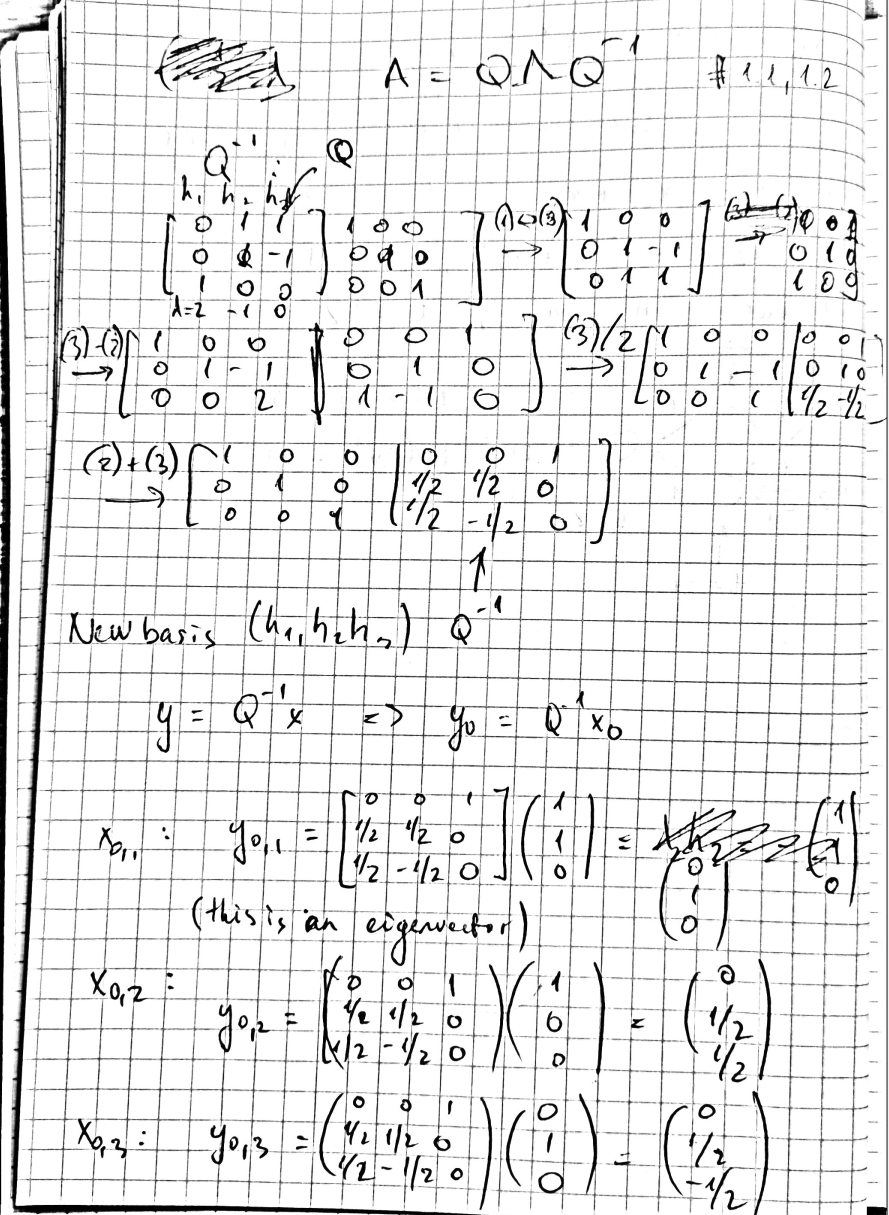

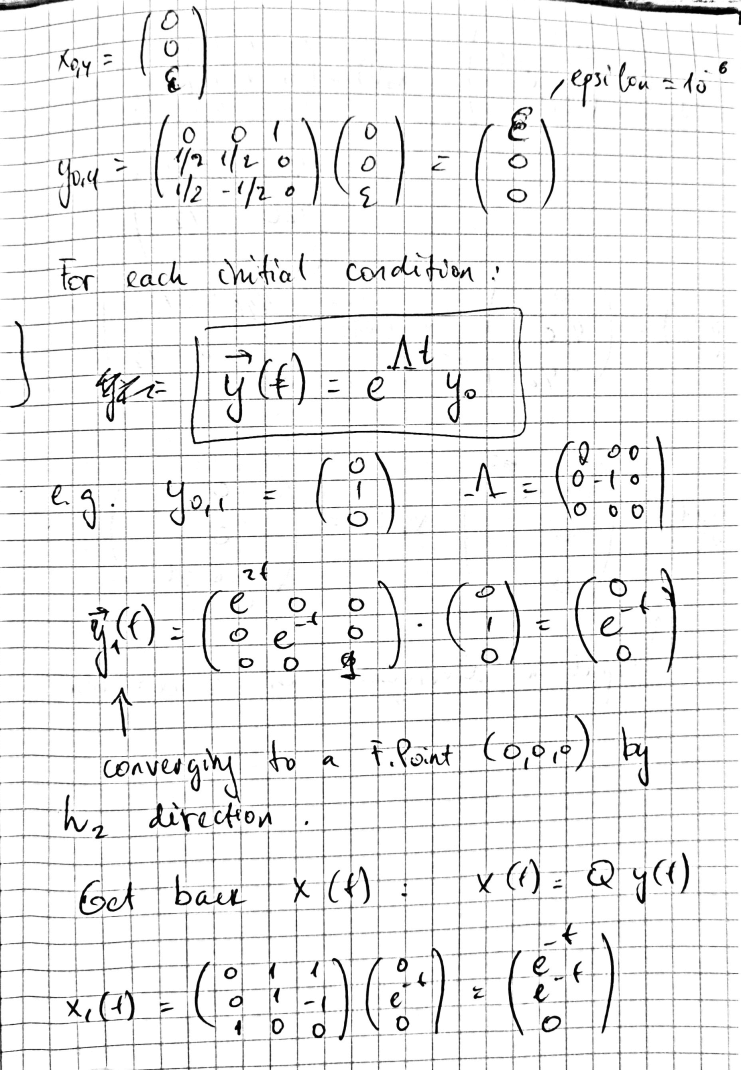

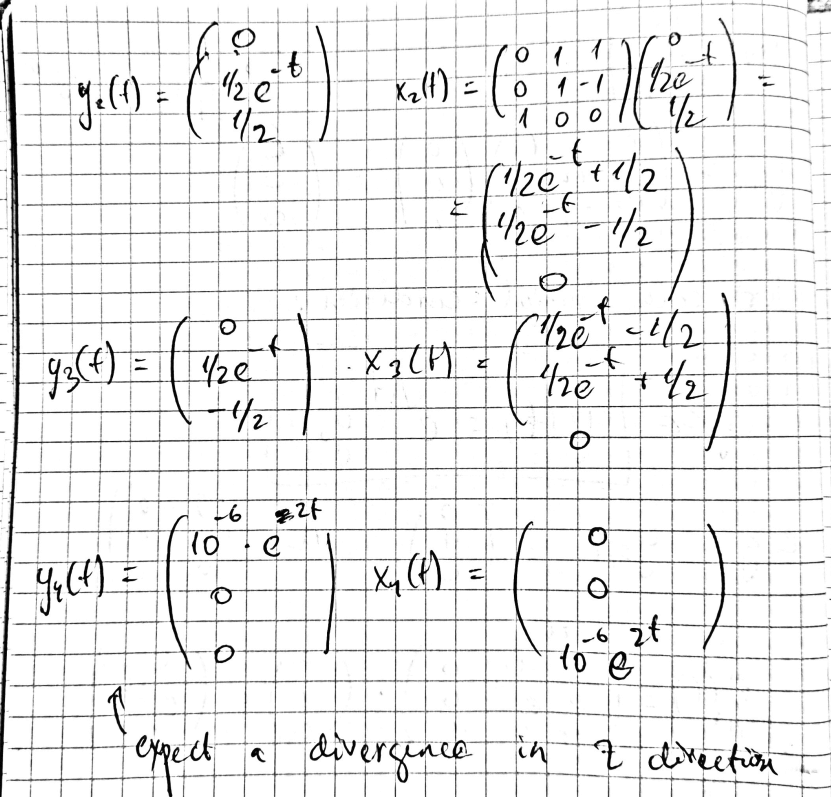

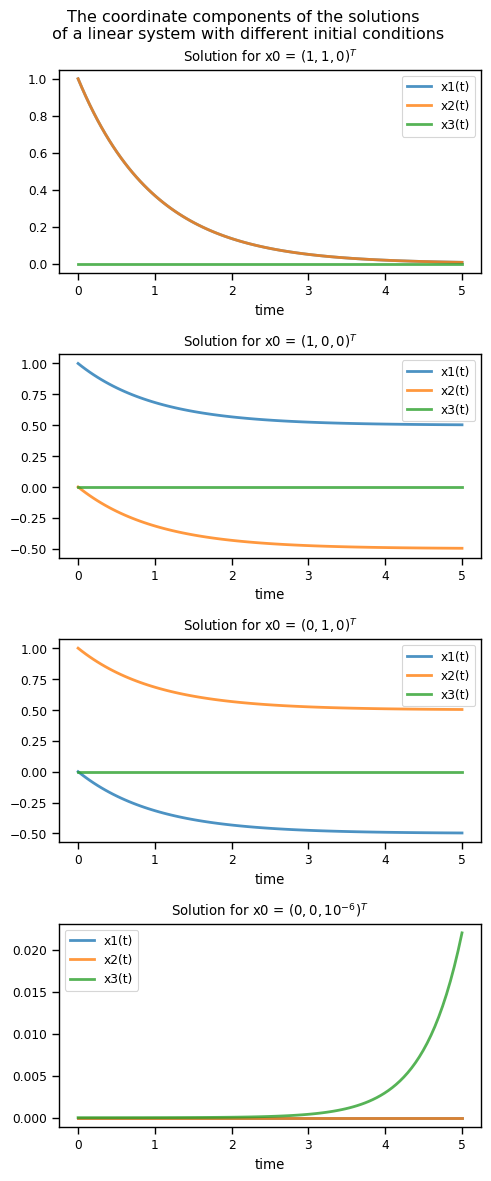

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')
### CODE FOR YOUR PLOT HERE ###

t = np.linspace(0, 5, 100)

# how I got these formulas look in the pen and paper.
# 
# I got these through diagonalizing A and using eigenvectors as a new basis
# after acquiring easy analytical solution y(t) it is possible 
# to get back to the original basis
# and write an explicit solution x(t)

x0_label_list = [r"$(1, 1, 0)^T$", r"$(1, 0, 0)^T$", r"$(0, 1, 0)^T$", r"$(0, 0, 10^{-6})^T$"]

sol_1 = [np.exp(-t), np.exp(-t), np.zeros(len(t))]
sol_2 = [1/2 * np.exp(-t) + 1/2, 1/2 * np.exp(-t) - 1/2, np.zeros(len(t))]
sol_3 = [1/2 * np.exp(-t) - 1/2, 1/2 * np.exp(-t) + 1/2, np.zeros(len(t))]
sol_4 = [np.zeros(len(t)), np.zeros(len(t)), 1e-6 * np.exp(2 * t)]

sols = np.array([sol_1, sol_2, sol_3, sol_4])


fig, axes = plt.subplots(4, 1, figsize=(5, 12))

for i in range(4):
    ax = axes[i]
    sol = sols[i]
    
    for j in range(3):
        ax.plot(t, sol[j], label=f"x{j+1}(t)", linewidth=2, alpha=0.8)
        ax.set_xlabel("time")
        
    ax.set_title("Solution for x0 = " + x0_label_list[i])
  
    ax.legend()
plt.suptitle("The coordinate components of the solutions \n of a linear system with different initial conditions")
plt.tight_layout()

    

### CODE FOR YOUR PLOT HERE ###

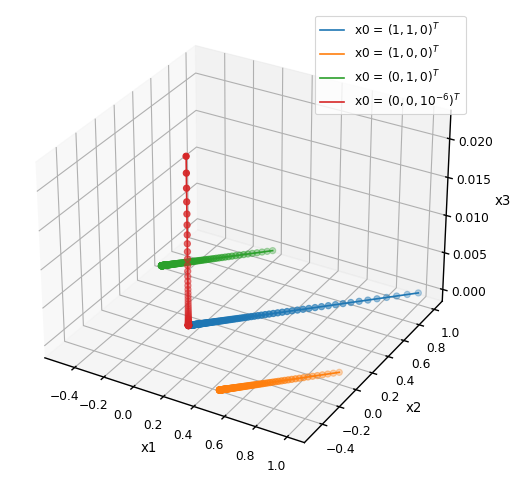

In [56]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')

for i in range(4):
    #ax = fig.add_subplot(4, 1, i+1, projection='3d')
    ax.plot3D(sols[i, 0], sols[i, 1], sols[i, 2], label="x0 = " + x0_label_list[i])
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.scatter3D(sols[i, 0], sols[i, 1], sols[i, 2], cmap='Greens')
    ax.legend()
    
plt.show()

**Explanation:**

- The solution cannot leave x1-x2 plane, because x1, x2 are decoupled from x3: $\dot{x}_3(t) = 0$ for $x_3 = 0$.
- However, when a starting point has even a slight deflection in the $x_3$ direction, the explosive increase in $x_3$ happends, because of the positive exponent coefficient: $\dot{x_3}(t) = 2x_3 \Rightarrow x_3(t) = x_3^{(0)}e^{2t}$
- All the x1-x2 plane solutions seem to be parallel. Probably there is an eigenvector of $A$ perpendicular to the solutions, which corresponds to the eigenvalue $\lambda = 0$, as the solutions do not propagate in the perpendicular direction. Also, the solutions seem to converge the origin (fixed point), which suggests it is stable at least at $x_3 = 0$ plane.

#### 1.3
Plot the vector field of the dynamical system as a quiver plot in the three projection planes defined respectively by
1. $x_3 = 0$,
2. $x_2 = 0$,
3. $x_1 = 0$.

Explain the solutions observed in 1.2 using the quiver plots.

*Hint:* Matplotlib has a built-in function for quiver plots. An explanation of how it works can be found here: https://www.geeksforgeeks.org/quiver-plot-in-matplotlib/. For a given plane, take vectors $x$ from the plane and project the corresponding $\dot{x}$ into the plane.

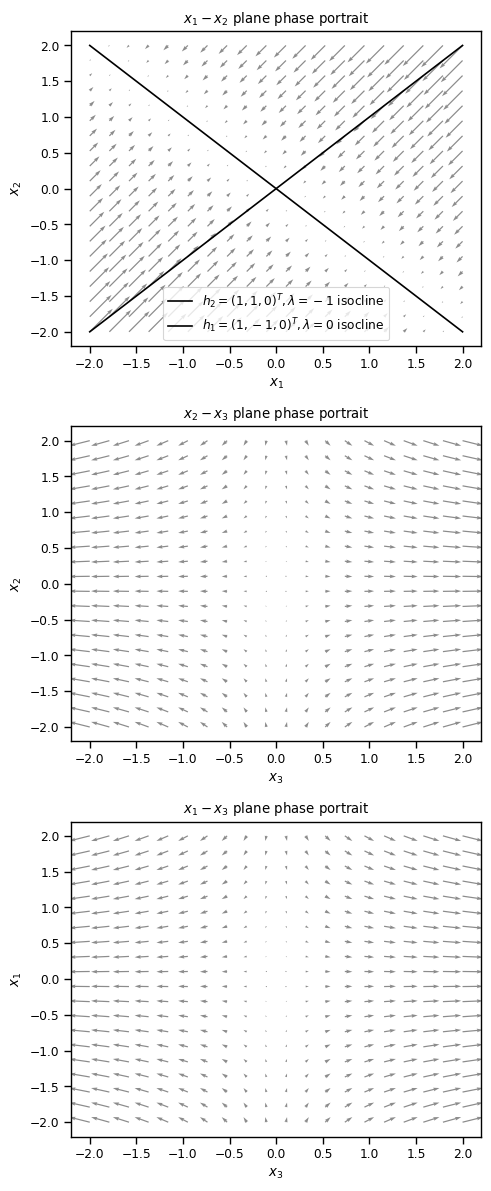

In [68]:
### CODE FOR YOUR PLOTS HERE ###

fig, axes = plt.subplots(3, 1, figsize=(5, 12))

A = np.array([[-0.5, -0.5, 0], [-0.5, -0.5, 0], [0, 0, 2]])


grid = np.linspace(-2, 2, 20)
dx = np.zeros((len(grid), len(grid), 3))

# depending on which component is zero we take the other two to create the grid

# x1-x2 plane
for i, g1 in enumerate(grid):
    for j, g2 in enumerate(grid):
        dx[i, j, :] = np.squeeze(A @ np.array([g1, g2, 0]).reshape(-1, 1))

ax = axes[0]
ax.set_title(r"$x_1-x_2$ plane phase portrait")
ax.quiver(grid, grid, dx[:, :, 1], dx[:, :, 0], color='grey', alpha=0.9)
ax.plot(grid, grid, color='black', label=r"$h_2 = (1, 1, 0)^T, \lambda = -1$ isocline")
ax.plot(grid, -grid, color='black', label=r"$h_1 = (1, -1, 0)^T, \lambda = 0$ isocline")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.legend()


# x2-x3 plane
for i, g1 in enumerate(grid):
    for j, g2 in enumerate(grid):
        dx[i, j, :] = np.squeeze(A @ np.array([0, g1, g2]).reshape(-1, 1))

ax = axes[1]
ax.set_title(r"$x_2-x_3$ plane phase portrait")
ax.quiver(grid, grid, dx[:, :, 2], dx[:, :, 1], color='grey', alpha=0.9)
# ax.plot(grid, grid, color='black', label=r"$h_2 = (1, 1, 0)^T, \lambda = -1$ isocline")
# ax.plot(grid, -grid, color='black', label=r"$h_1 = (1, -1, 0)^T, \lambda = 0$ isocline")
ax.set_xlabel(r"$x_3$")
ax.set_ylabel(r"$x_2$")

# x1-x3 plane
for i, g1 in enumerate(grid):
    for j, g2 in enumerate(grid):
        dx[i, j, :] = np.squeeze(A @ np.array([g1, 0, g2]).reshape(-1, 1))

ax = axes[2]
ax.set_title(r"$x_1-x_3$ plane phase portrait")
ax.quiver(grid, grid, dx[:, :, 2], dx[:, :, 0], color='grey', alpha=0.9)
# ax.plot(grid, grid, color='black', label=r"$h_2 = (1, 1, 0)^T, \lambda = -1$ isocline")
# ax.plot(grid, -grid, color='black', label=r"$h_1 = (1, -1, 0)^T, \lambda = 0$ isocline")
ax.set_xlabel(r"$x_3$")
ax.set_ylabel(r"$x_1$")

plt.tight_layout()
### CODE FOR YOUR PLOTS HERE ###




**Explanation:**

- The x1-x2 (x3 = 0) plane is spanned by two eigenvectors: one with negative value and one equals 0. x3 itself is an eigenaxis, because once the point is there it won't leave. The interaction of x1, x2 stability and x3-direction instability generates phase portraits shown on the 2nd and 3rd plots above. 


#### 1.4
Plot the vector field of the dynamics in the projection on the plane defined by
$$
e_1 = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\-1\\0 \end{pmatrix}, \hspace{.5em}
e_2 = \begin{pmatrix} 0\\0\\1 \end{pmatrix}.
$$
How can this result be explained?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


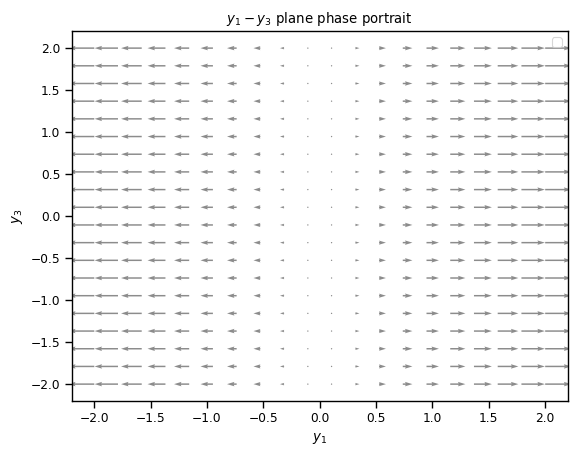

In [6]:
### CODE FOR YOUR PLOTS HERE ###

fig, axes = plt.subplots(1, 1)

for i, g1 in enumerate(grid):
    for j, g2 in enumerate(grid):
        dx[i, j, :] = np.array([0 * g1, 0, 2 * g2]) # lambda(h1) = 0, lambda(h3) = 2

ax = axes
ax.set_title(r"$y_1-y_3$ plane phase portrait")
ax.quiver(grid, grid, dx[:, :, 2], dx[:, :, 0], color='grey', alpha=0.9)
# ax.plot(grid, grid, color='black', label=r"$h_2 = (1, 1, 0)^T, \lambda = -1$ isocline")
# ax.plot(grid, -grid, color='black', label=r"$h_1 = (1, -1, 0)^T, \lambda = 0$ isocline")
ax.set_xlabel(r"$y_1$")
ax.set_ylabel(r"$y_3$")
ax.legend()

### CODE FOR YOUR PLOTS HERE ###

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


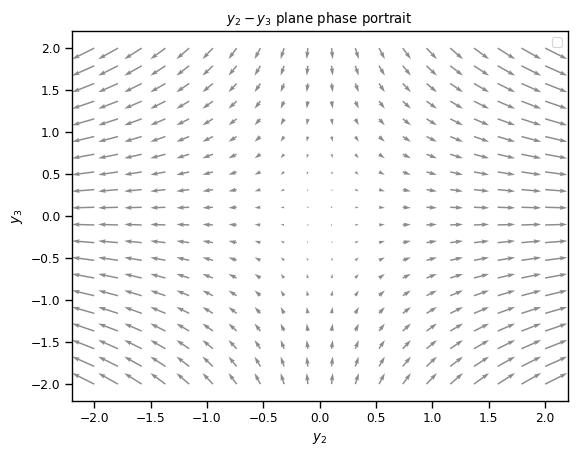

In [7]:
### CODE FOR YOUR PLOTS HERE ###

fig, axes = plt.subplots(1, 1)

for i, g1 in enumerate(grid):
    for j, g2 in enumerate(grid):
        dx[i, j, :] = np.array([0, -1 * g1, 2 * g2]) # lambda(h1) = 0, lambda(h3) = 2

ax = axes
ax.set_title(r"$y_2-y_3$ plane phase portrait")
ax.quiver(grid, grid, dx[:, :, 2], dx[:, :, 1], color='grey', alpha=0.9)
# ax.plot(grid, grid, color='black', label=r"$h_2 = (1, 1, 0)^T, \lambda = -1$ isocline")
# ax.plot(grid, -grid, color='black', label=r"$h_1 = (1, -1, 0)^T, \lambda = 0$ isocline")
ax.set_xlabel(r"$y_2$")
ax.set_ylabel(r"$y_3$")
ax.legend()

### CODE FOR YOUR PLOTS HERE ###

**Explanation:** 

The projection planes defined in this exercise are exactly the planes spanned by the $A$ eigenvectors. Thus, omitting the 3rd component the vector field locally can be analysed as a 2D field. Given that $lambda_1 = 2, lambda_2 = -1, lambda_3 = 0$ the pairwise combinations give rise to different planes with different dynamics determined by the sign of value of the eigenvalues. $y_1-y_3$ plane is expected to be a saddle, and the other two planes are degenerate stable and unstable nodes respectively. Degenerate means that one eigenvalue is equals to zero, generating a quasi-stable line with $\dot{x}(t) = 0$

#### 1.5
Now consider a system with constant input, namely $\dot{x}(t) = Ax(t) + s(t)$ where A is as before and $s(t) = (1,2,0)^T$. Compute the solution for the initial condition $(0,0,0)^T$. Plot the solution projected onto the planes defined by

1. $x_3 = 0$,
2. the plane from 1.4.

What do you observe?

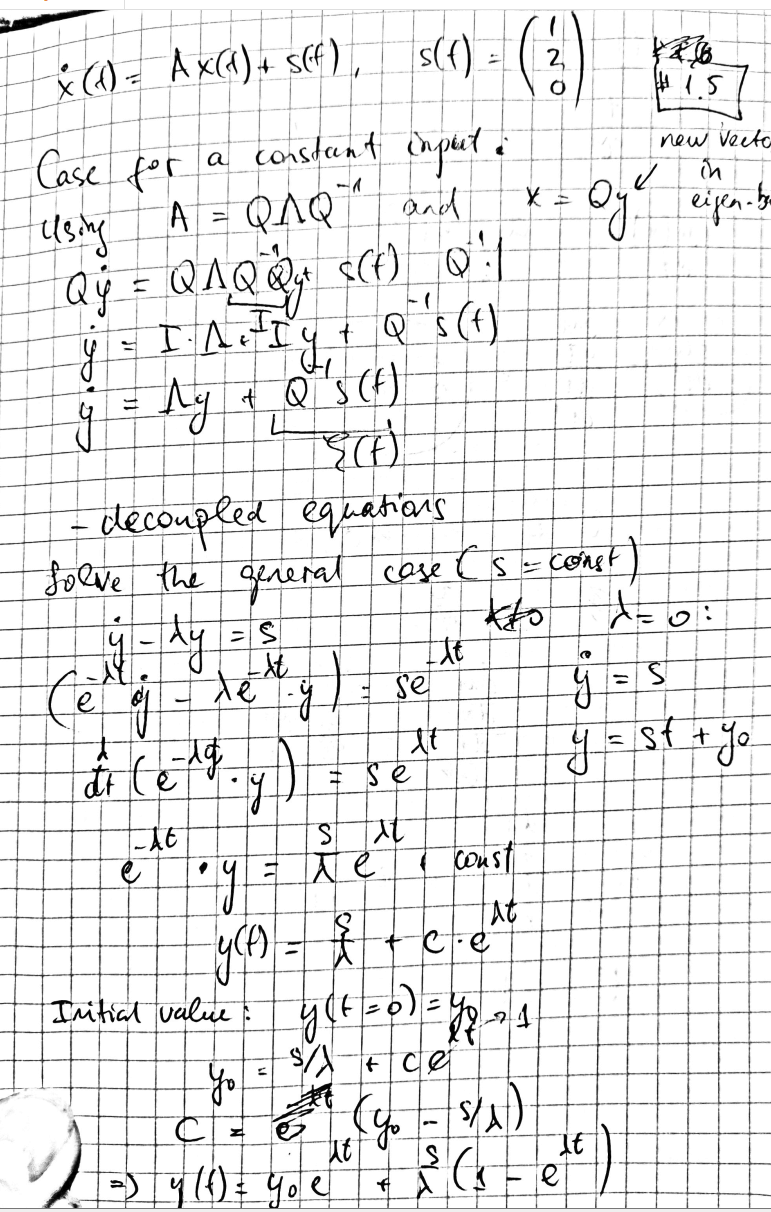

In [89]:
### CODE FOR YOUR PLOTS HERE ###

Q       = np.array([[0, 1, 1], [0, 1, -1], [1, 0, 0]])
Q_inv   = np.linalg.inv(Q) # I have calculated that by hand as well
lambdas = np.array([2, -1, 0])
Lambda  = np.diag(lambdas)
#Lambda_inv = np.linalg.inv(Lambda)

sx = np.array([1, 2, 0]).reshape((3, 1))
x0 = np.zeros((3, 1))

sy = Q_inv @ sx
y0 = Q_inv @ x0

times = np.linspace(0, 10, 100)
sol_y = np.zeros((len(times), 3, 1))
sol_x = np.zeros((len(times), 3, 1))

for i, t in enumerate(times):
    y1 = y0[0, 0] * np.exp(lambdas[0] * t) + sy[0, 0] / lambdas[0] * (1 - np.exp(lambdas[0] * t))
    y2 = y0[1, 0] * np.exp(lambdas[1] * t) + sy[1, 0] / lambdas[1] * (1 - np.exp(lambdas[1] * t))
    y3 = y0[2, 0] + sy[2, 0] * t
    
    sol_y[i, :, 0] = np.array([y1, y2, y3])
    sol_x[i, :]    = Q @ sol_y[i, :]
    

### CODE FOR YOUR PLOTS HERE ###

Text(0.5, 1.0, 'x(t) projected onto the x1-x2 plane')

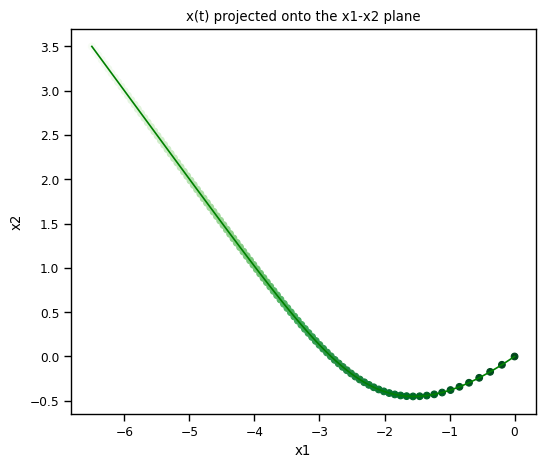

In [90]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))

ax = axes
ax.plot(sol_x[:, 0, 0], sol_x[:, 1, 0], color='green', )
ax.scatter(sol_x[:, 0, 0], sol_x[:, 1, 0], cmap='Greens_r', c=np.arange(len(times)))

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title("x(t) projected onto the x1-x2 plane")

Text(0.5, 1.0, 'y(t) projected onto the y1-y3 plane')

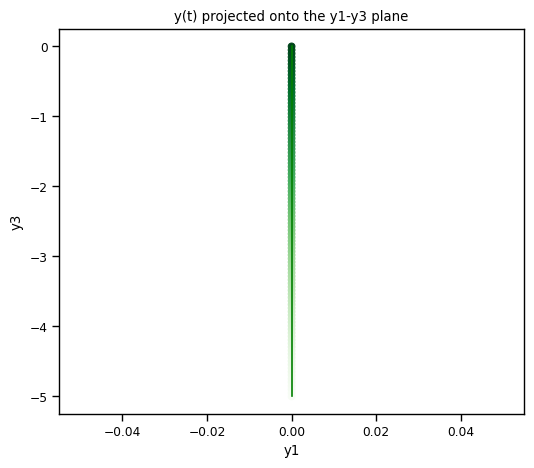

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(sol_y[:, 0, 0], sol_y[:, 2, 0], color='green')
ax.scatter(sol_y[:, 0, 0], sol_y[:, 2, 0], cmap='Greens_r', c=np.arange(len(times)))

ax.set_xlabel('y1')
ax.set_ylabel('y3')
ax.set_title("y(t) projected onto the y1-y3 plane")

**Explanation:** 

- The constant input in general, though, should change the corresponding components of a vector field, so that each velocity vector $\dot{x}$ of an original dynamical system is added with the constant input vector $s$.
- That, in particular, means that the fixed point of a homogenous system may not be stationary in an inhomogeneous case. The plot above shows that starting from $(0, 0, 0)^T$ the trajectory evolves, confirming the point.
- The $x_3 = 0$ plane solution demonstrates that the solution first deflects to a certain point, and then assymptotically approaches a straight line.
- The 2nd projection shows the same straight line which could be observed for the other solutions following $\lambda = 0$ eigenvector. This is due to the fact that the $x_3$ component of the system did not change with the input $(1, 2, 0)^T$. 